In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [21]:
data_frame = pd.read_csv('churn_data.csv')
data_frame_columns = data_frame.columns
for col in data_frame.columns:
    print(f'Column:{col} - Unique Values: {data_frame[col].unique()}')

Column:customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column:gender - Unique Values: ['Female' 'Male']
Column:SeniorCitizen - Unique Values: [0 1]
Column:Partner - Unique Values: ['Yes' 'No']
Column:Dependents - Unique Values: ['No' 'Yes']
Column:tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column:PhoneService - Unique Values: ['No' 'Yes']
Column:MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column:InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column:OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column:OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column:DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column:TechSupport - Unique Va

In [22]:
data_frame_info = data_frame.info()
print(data_frame_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
data_frame['TotalCharges'] = pd.to_numeric(data_frame['TotalCharges'], errors='coerce')
data_frame_info = data_frame.info()
print(data_frame_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
missing_total_charges = data_frame[data_frame['TotalCharges'].isnull()]
print(missing_total_charges)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [25]:
data_frame.dropna(inplace=True)
data_frame.drop(columns='customerID', inplace=True)
unique_payment_methods = data_frame.PaymentMethod.unique()
print(unique_payment_methods)



['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [26]:
data_frame['PaymentMethod'] = data_frame['PaymentMethod'].str.replace(' (automatic)', '', regex=False)
unique_payment_methods = data_frame.PaymentMethod.unique()
print(unique_payment_methods)



['Electronic check' 'Mailed check' 'Bank transfer' 'Credit card']


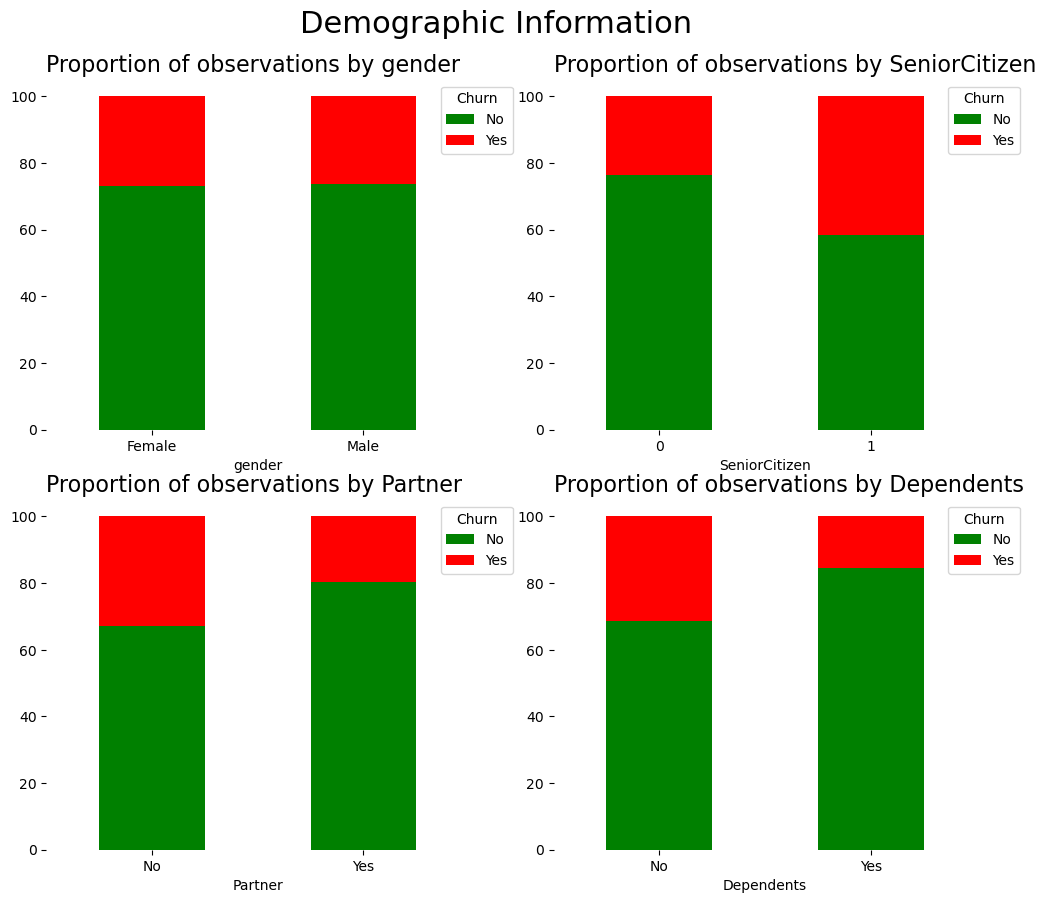

In [27]:

def plot_stacked_percentage(columns, title):
    no_of_col = 2
    no_of_rows = math.ceil(len(columns) / 2)

    fig = plt.figure(figsize=(12, 5 * no_of_rows))
    fig.suptitle(title, fontsize=22, y=0.95)

    for idx, col in enumerate(columns, 1):
        ax = fig.add_subplot(no_of_rows, no_of_col, idx)

        prop_by_independent = pd.crosstab(data_frame[col], data_frame['Churn']).apply(lambda x: x / x.sum() * 100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True, rot=0, color=['green', 'red'])

        ax.legend(loc='upper right', bbox_to_anchor=(0.62, 0.5, 0.5, 0.5), title='Churn', fancybox=True)

        ax.set_title('Proportion of observations by ' + col, fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        spine_names = ('top', 'right', 'bottom', 'left')
        for spine in spine_names:
            ax.spines[spine].set_visible(False)

demographics = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

plot_stacked_percentage(demographics, 'Demographic Information')



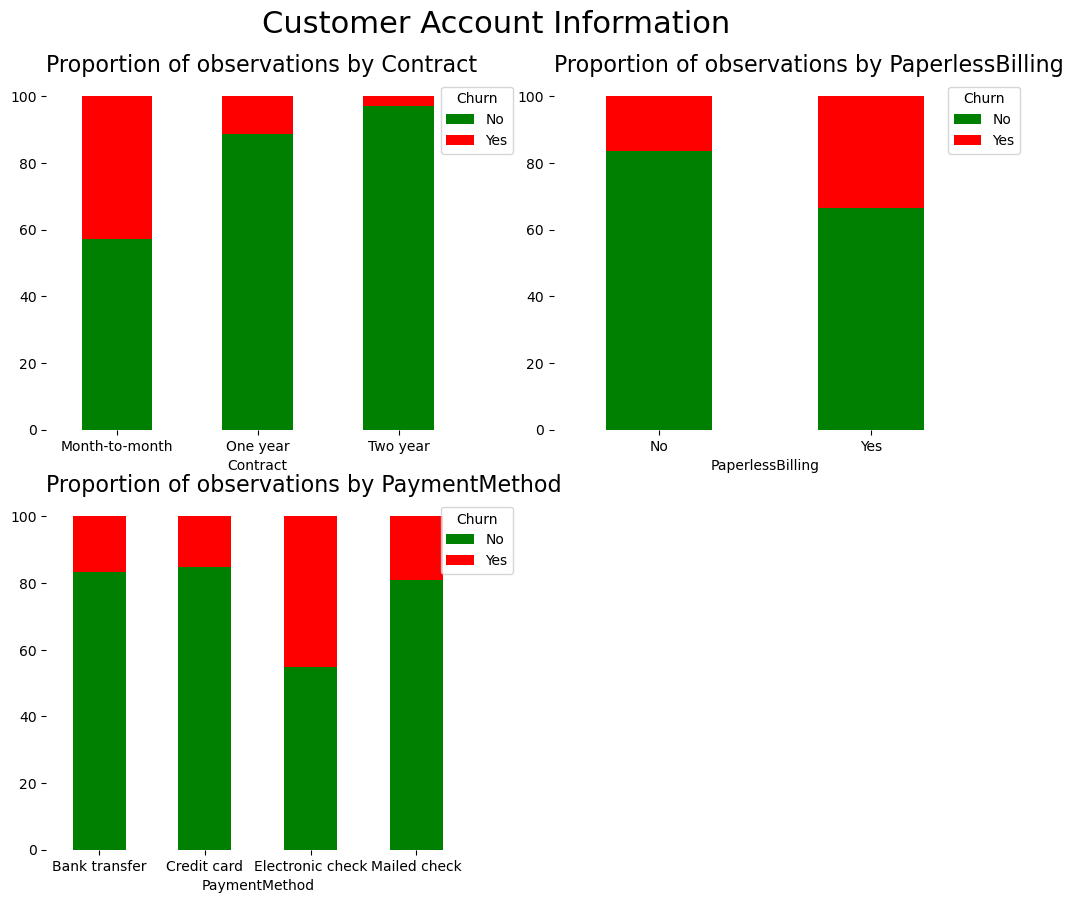

In [28]:
account_info = ['Contract', 'PaperlessBilling', 'PaymentMethod']

plot_stacked_percentage(account_info, 'Customer Account Information')


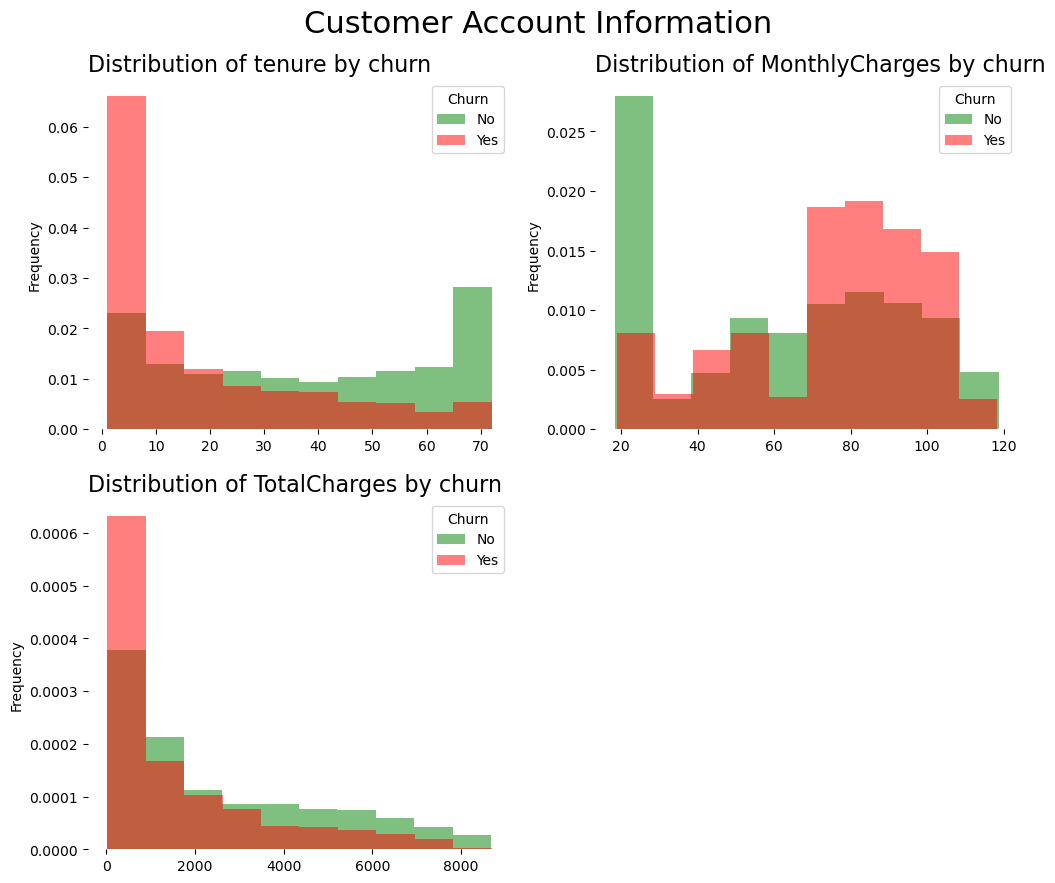

In [29]:
def plot_histograms(columns, title):
    no_of_col = 2
    no_of_rows = math.ceil(len(columns) / 2)

    fig = plt.figure(figsize=(12, 5 * no_of_rows))
    fig.suptitle(title, fontsize=22, y=0.95)

    for idx, column in enumerate(columns, 1):
        ax = fig.add_subplot(no_of_rows, no_of_col, idx)

        data_frame[data_frame['Churn'] == 'No'][column].plot(kind='hist', ax=ax, density=True, alpha=0.5, color='green', label='No')
        data_frame[data_frame['Churn'] == 'Yes'][column].plot(kind='hist', ax=ax, density=True, alpha=0.5, color='red', label='Yes')

        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5), title='Churn', fancybox=True)
        ax.set_title('Distribution of ' + column + ' by churn', fontsize=16, loc='left')
        ax.tick_params(rotation='auto')

        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

numeric_account_info = ['tenure', 'MonthlyCharges', 'TotalCharges']

plot_histograms(numeric_account_info, 'Customer Account Information')



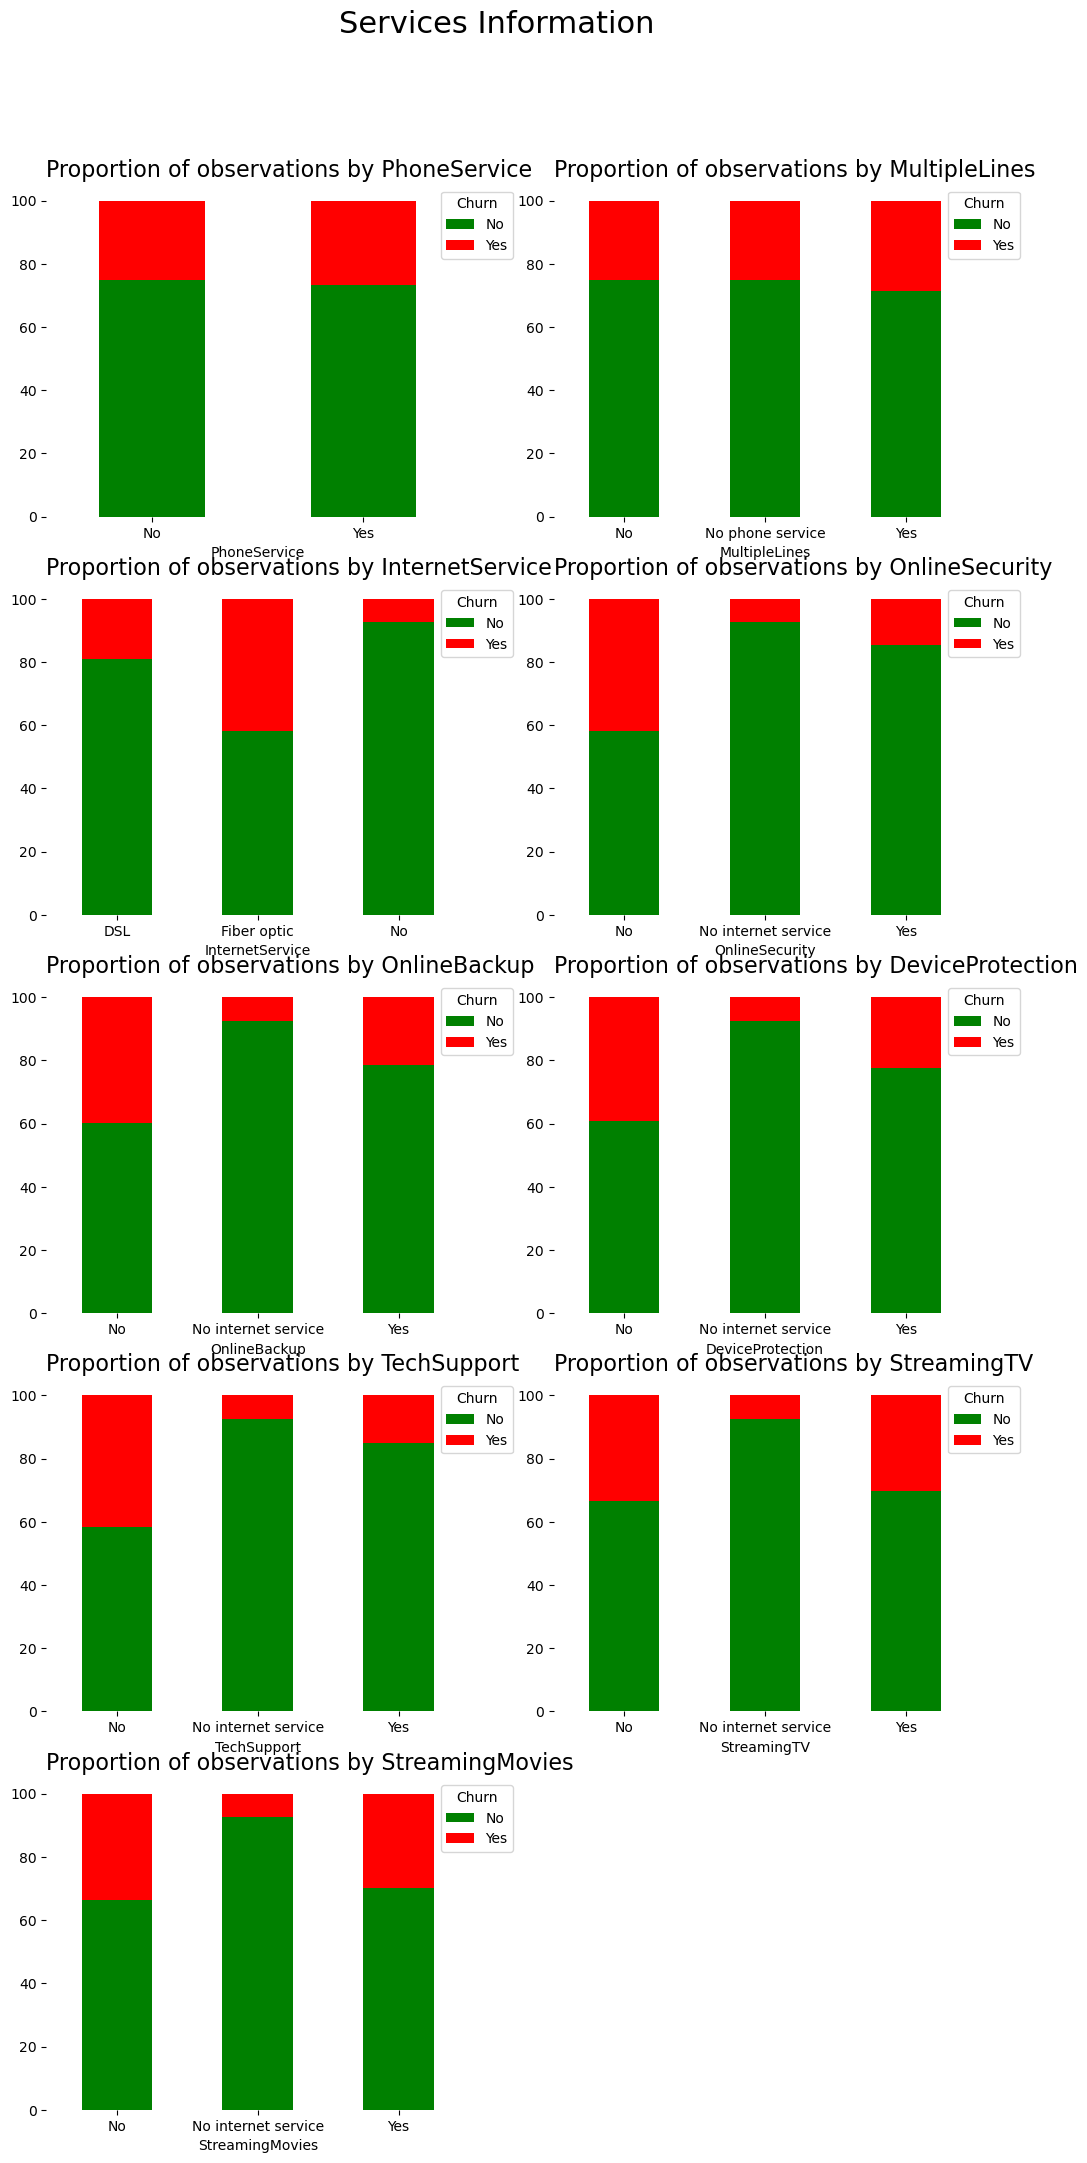

In [30]:
services_info = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plot_stacked_percentage(services_info, 'Services Information')


In [31]:
def calculate_mutual_information(categorical_data):
    return mutual_info_score(categorical_data, data_frame.Churn)

categorical_vars = data_frame.select_dtypes(include=object).drop('Churn', axis=1)
feature_importance = categorical_vars.apply(calculate_mutual_information).sort_values(ascending=False)

print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


In [32]:
data_frame_transformed = data_frame.copy()

label_encode_cols = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

for col in label_encode_cols:
    if col == 'gender':
        data_frame_transformed[col] = data_frame_transformed[col].map({'Female': 1, 'Male': 0})
    else:
        data_frame_transformed[col] = data_frame_transformed[col].map({'Yes': 1, 'No': 0})


In [33]:
one_hot_encode_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

data_frame_transformed = pd.get_dummies(data_frame_transformed, columns=one_hot_encode_cols)

print(data_frame_transformed)


      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           0       1             0   
1          0              0        0           0      34             1   
2          0              0        0           0       2             1   
3          0              0        0           0      45             0   
4          1              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       0              0        1           1      24             1   
7039       1              0        1           1      72             1   
7040       1              0        1           1      11             0   
7041       0              1        1           0       4             1   
7042       0              0        0           0      66             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                    1           29.85     

In [34]:
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in min_max_columns:
    min_val = data_frame_transformed[column].min()
    max_val = data_frame_transformed[column].max()

    data_frame_transformed[column] = (data_frame_transformed[column] - min_val) / (max_val - min_val)
X_data = data_frame_transformed.drop(columns='Churn')
y_data = data_frame_transformed.loc[:, 'Churn']

print(X_data.columns)
print(y_data.name)


X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25, shuffle=True)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'Paym

In [35]:

def create_classifier_models(seed=2):
    classifiers = []
    classifiers.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
    classifiers.append(('k_nearest_neighbor', KNeighborsClassifier()))
    classifiers.append(('logistic_regression', LogisticRegression(random_state=seed)))
    classifiers.append(('support_vector_machines', SVC(random_state=seed)))
    classifiers.append(('random_forest', RandomForestClassifier(random_state=seed)))
    classifiers.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))

    return classifiers

classifier_models = create_classifier_models()


In [36]:


results = []
classifier_names = []
scoring_metric = 'accuracy'

for classifier_name, classifier_model in classifier_models:
    classifier_model.fit(X_train, y_train)
    predictions = classifier_model.predict(X_test)
    classifier_accuracy = accuracy_score(y_test, predictions)
    
    results.append(classifier_accuracy)
    classifier_names.append(classifier_name)

    print(f'Classifier: {classifier_name}, Accuracy: {classifier_accuracy}')


Classifier: dummy_classifier, Accuracy: 0.7235494880546075


c:\Users\iammo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classifier: k_nearest_neighbor, Accuracy: 0.7497155858930603
Classifier: logistic_regression, Accuracy: 0.8037542662116041
Classifier: support_vector_machines, Accuracy: 0.7935153583617748
Classifier: random_forest, Accuracy: 0.785551763367463
Classifier: gradient_boosting, Accuracy: 0.8100113765642776


In [37]:


hyperparameter_grid = {'n_estimators': [80, 90, 100, 110, 115, 120],
                       'max_depth': [3, 4, 5, 6],
                       'max_features': [None, 'auto', 'sqrt', 'log2'],
                       'min_samples_split': [2, 3, 4, 5]}

random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=hyperparameter_grid,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)
print(random_search.best_params_)


{'n_estimators': 110, 'min_samples_split': 3, 'max_features': 'log2', 'max_depth': 3}


In [38]:


random_search_predictions = random_search.predict(X_test)

conf_matrix = confusion_matrix(y_test, random_search_predictions)

print(conf_matrix)


[[1161  111]
 [ 218  268]]


In [39]:
classification_rep = classification_report(y_test, random_search_predictions)
print(classification_rep)


              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1272
           1       0.71      0.55      0.62       486

    accuracy                           0.81      1758
   macro avg       0.77      0.73      0.75      1758
weighted avg       0.80      0.81      0.81      1758



In [40]:


accuracy = accuracy_score(y_test, random_search_predictions)
print(accuracy)


0.8128555176336746
